In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from pathlib import Path

c:\Users\tunga\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_path = Path("Sugarcane Dataset")

Data Exploration

In [4]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 5 directories and 0 images in 'Sugarcane Dataset'.
There are 0 directories and 522 images in 'Sugarcane Dataset\Healthy'.
There are 0 directories and 462 images in 'Sugarcane Dataset\Mosaic'.
There are 0 directories and 518 images in 'Sugarcane Dataset\RedRot'.
There are 0 directories and 514 images in 'Sugarcane Dataset\Rust'.
There are 0 directories and 505 images in 'Sugarcane Dataset\Yellow'.


Random Image Path: Sugarcane Dataset\Yellow\yellow (193).jpeg
Image Class: Yellow
Image Height: 1040
Image Width: 493


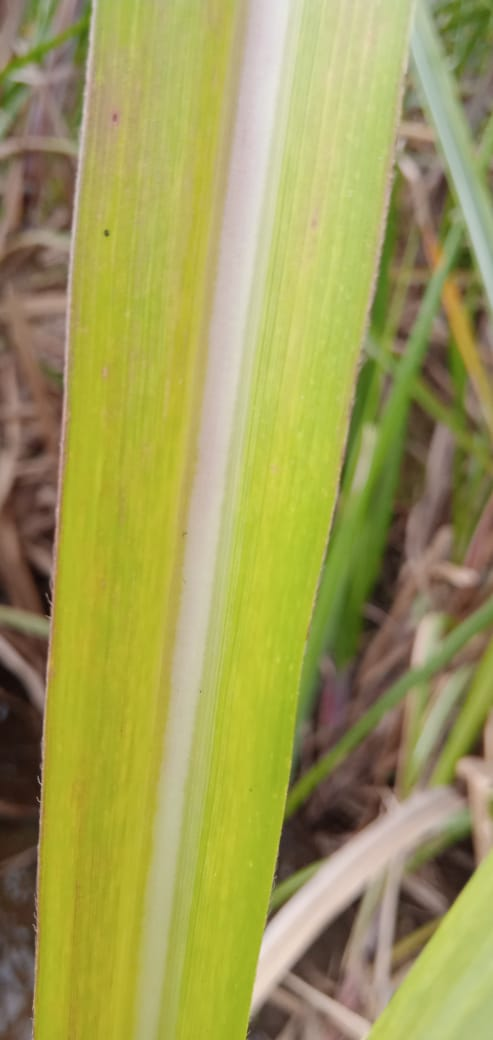

In [3]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*.jpeg"))

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random Image Path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

(-0.5, 492.5, 1039.5, -0.5)

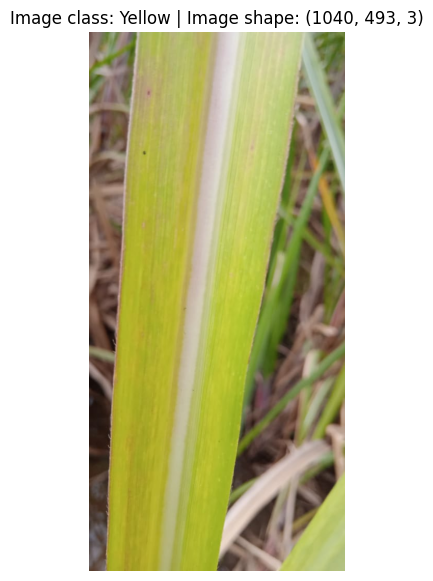

In [4]:
img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)

In [5]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor()
])

custom_dataset = datasets.ImageFolder(root=image_path, transform=transform)
loader = torch.utils.data.DataLoader(custom_dataset, batch_size=32, shuffle=False, num_workers=2)

mean = 0.0
std = 0.0
total_images_count = 0

for images, _ in loader:
    batch_images_count = images.size(0)
    images = images.view(batch_images_count, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images_count += batch_images_count

mean /= total_images_count
std /= total_images_count

print(f'Mean: {mean}')
print(f'Std: {std}')


Mean: tensor([0.4977, 0.5281, 0.3800])
Std: tensor([0.1744, 0.1733, 0.1814])


Transforming Data


In [6]:
from torchvision.transforms import v2

transforms = v2.Compose([
    v2.Resize(size =(224,224), antialias=True),
    v2.RandomHorizontalFlip(0.5),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean, std) 
])
transforms(img)

Image([[[-0.4478, -0.2679, -0.0879,  ..., -0.2679, -0.4028, -0.5603],
        [-0.3803, -0.2229, -0.0879,  ..., -0.5378, -0.5378, -0.5378],
        [-0.3354, -0.2004, -0.0430,  ..., -1.1001, -0.9202, -0.6278],
        ...,
        [-0.4028, -0.4703, -0.6053,  ...,  1.1716,  1.1716,  1.1716],
        [-0.6502, -0.6727, -0.7402,  ...,  1.1716,  1.1941,  1.1941],
        [-0.8302, -0.8302, -0.8527,  ...,  1.1716,  1.1716,  1.1716]],

       [[-1.2821, -1.1011, -0.8522,  ...,  0.0528, -0.0603, -0.2187],
        [-1.2142, -1.0558, -0.8522,  ..., -0.2187, -0.2187, -0.2187],
        [-1.1689, -1.0332, -0.8296,  ..., -0.7617, -0.6033, -0.3318],
        ...,
        [-0.8069, -0.9201, -1.1011,  ...,  1.3198,  1.3198,  1.3198],
        [-1.1689, -1.2594, -1.3726,  ...,  1.3198,  1.3424,  1.3424],
        [-1.4857, -1.5083, -1.5762,  ...,  1.3198,  1.3198,  1.3198]],

       [[-0.5381, -0.3652, -0.1490,  ..., -0.6678, -0.7543, -0.8840],
        [-0.4732, -0.3219, -0.1490,  ..., -0.9489, -0.9272, 

In [7]:
transforms(img).shape

torch.Size([3, 224, 224])

In [8]:
dataset = datasets.ImageFolder(root=image_path, transform = transforms)
train_ratio = 0.8
test_ratio = 0.2
classes = dataset.classes
classes

['Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import DataLoader, Subset
targets = [label for _, label in dataset.samples]

# Define the split ratio
train_ratio = 0.8
test_ratio = 0.2

# Create stratified split
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, train_size=train_ratio)

# Get train and test indices
train_indices, test_indices = next(strat_split.split(np.zeros(len(targets)), targets))

# Create train and test subsets
train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print the number of samples in each set
print(f'Number of training samples: {len(train_dataset)}')
print(f'Number of testing samples: {len(test_dataset)}')

# Verify the class distribution in each set
train_targets = [targets[i] for i in train_indices]
test_targets = [targets[i] for i in test_indices]

print(f'Training set class distribution: {np.bincount(train_targets)}')
print(f'Testing set class distribution: {np.bincount(test_targets)}')

Number of training samples: 2016
Number of testing samples: 505
Training set class distribution: [417 370 414 411 404]
Testing set class distribution: [105  92 104 103 101]


In [10]:
class_dict = dataset.class_to_idx
class_dict

{'Healthy': 0, 'Mosaic': 1, 'RedRot': 2, 'Rust': 3, 'Yellow': 4}

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*53*53,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        self.dropout = nn.Dropout(0.5)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [14]:
import torch.optim as optim

# Define your network, criterion, optimizer, and data loader (trainloader) here

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()

        # calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # print statistics every 2000 mini-batches
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # print loss and accuracy for each epoch
    accuracy = 100 * correct / total
    print(f'Epoch {epoch + 1} - Loss: {running_loss / len(train_loader):.3f}, Accuracy: {accuracy:.2f}%')

print('Finished Training')


Epoch 1 - Loss: 1.424, Accuracy: 41.52%
Epoch 2 - Loss: 1.028, Accuracy: 56.65%
Epoch 3 - Loss: 0.927, Accuracy: 63.24%
Epoch 4 - Loss: 0.832, Accuracy: 66.57%
Epoch 5 - Loss: 0.676, Accuracy: 74.90%
Epoch 6 - Loss: 0.576, Accuracy: 78.27%
Epoch 7 - Loss: 0.516, Accuracy: 80.75%
Epoch 8 - Loss: 0.442, Accuracy: 84.18%
Epoch 9 - Loss: 0.358, Accuracy: 86.95%
Epoch 10 - Loss: 0.344, Accuracy: 88.05%
Epoch 11 - Loss: 0.261, Accuracy: 90.33%
Epoch 12 - Loss: 0.262, Accuracy: 90.58%
Epoch 13 - Loss: 0.190, Accuracy: 93.60%
Epoch 14 - Loss: 0.193, Accuracy: 93.50%
Epoch 15 - Loss: 0.180, Accuracy: 93.35%
Epoch 16 - Loss: 0.165, Accuracy: 94.15%
Epoch 17 - Loss: 0.144, Accuracy: 94.79%
Epoch 18 - Loss: 0.132, Accuracy: 95.34%
Epoch 19 - Loss: 0.131, Accuracy: 95.44%
Epoch 20 - Loss: 0.112, Accuracy: 96.18%
Finished Training


In [15]:
PATH = './Model.pth'
torch.save(net.state_dict(), PATH)

In [17]:
correct = 0
total = 0

net.eval() 
with torch.no_grad(): 
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


Test Accuracy: 78.42%


In [19]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [34]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 74 %


In [20]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Healthy is 82.9 %
Accuracy for class: Mosaic is 60.9 %
Accuracy for class: RedRot is 73.1 %
Accuracy for class: Rust  is 66.0 %
Accuracy for class: Yellow is 82.2 %
